In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

def load_breast_data():
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = data.target
    return X, y, data



#  **THEORETICAL ANSWERS**

---

## **1. Can we use Bagging for regression problems?**

Yes. Bagging works for **both classification and regression**.
For regression, it trains multiple regression models on different bootstrap samples and averages their predictions. This reduces variance and increases stability.

---

## **2. What is the difference between multiple model training and single model training?**

* **Single Model Training:** One model learns patterns; performance depends completely on that model.
* **Multiple Model Training:** Several models are trained, and their predictions are combined. This reduces overfitting, variance, and increases accuracy.

---

## **3. Explain the concept of feature randomness in Random Forest.**

Random Forest introduces randomness by selecting only a **subset of features** at each node split.
This prevents trees from becoming identical and improves diversity, reducing overfitting.

---

## **4. What is OOB (Out-of-Bag) Score?**

OOB score is the evaluation score obtained from the data samples that were **not selected** in bootstrap sampling.
It acts like **built-in cross-validation** for bagging and Random Forest.

---

## **5. How can you measure feature importance in a Random Forest model?**

Two common ways:

1. **Gini Importance (Mean Decrease in Impurity)** – how much each feature reduces impurity in splits.
2. **Permutation Importance** – increase in error when a feature’s values are shuffled.

---

## **6. Explain the working principle of a Bagging Classifier.**

Bagging trains multiple base learners on **different bootstrap samples** of the data.
Each model makes predictions, and final output is:

* **Majority vote** → classification
* **Average** → regression

---

## **7. How do you evaluate a Bagging Classifier’s performance?**

Use evaluation metrics like:

* Accuracy
* Precision, Recall, F1-score
* Confusion Matrix
* OOB Score (if enabled)

---

## **8. How does a Bagging Regressor work?**

It trains multiple regression models on random bootstrap samples.
Final prediction = **average of all model predictions**, which reduces variance.

---

## **9. What is the main advantage of ensemble techniques?**

They **improve accuracy and stability** by combining multiple models, reducing variance, and preventing overfitting.

---

## **10. What is the main challenge of ensemble methods?**

They can be:

* Computationally expensive
* Harder to interpret
* Slower during prediction with large ensembles

---

## **11. Explain the key idea behind ensemble techniques.**

The key idea is **“wisdom of the crowd”** — multiple weak models combined give a stronger, more stable model.

---

## **12. What is a Random Forest Classifier?**

It is an ensemble of **many decision trees**, each trained on bootstrap samples with random feature selection.
Final prediction = majority vote of all trees.

---

## **13. What are the main types of ensemble techniques?**

1. **Bagging** (Bootstrap Aggregating)
2. **Boosting** (Sequential training)
3. **Stacking** (Combining predictions through a meta-model)

---

## **14. What is ensemble learning in machine learning?**

It is a technique where multiple models (weak learners) are combined to create a single strong model that performs better.

---

## **15. When should we avoid using ensemble methods?**

Avoid when:

* You need a simple and interpretable model
* You have very small datasets
* You need very fast predictions
* Computational resources are limited

---

## **16. How does Bagging help in reducing overfitting?**

Bagging reduces overfitting by:

* Training models on different bootstrap samples
* Averaging their predictions
  This reduces variance and prevents the model from learning noise.

---

## **17. Why is Random Forest better than a single Decision Tree?**

Because it:

* Reduces overfitting
* Has lower variance
* Uses feature randomness
* Is more accurate and stable

---

## **18. What is the role of bootstrap sampling in Bagging?**

Bootstrap sampling selects random samples **with replacement** to create diverse datasets.
Each model sees a slightly different dataset → leads to diversity and reduced variance.

---

## **19. What are some real-world applications of ensemble techniques?**

* Fraud detection
* Credit scoring
* Medical diagnosis
* Spam detection
* Stock price prediction
* Recommendation systems

---

## **20. What is the difference between Bagging and Boosting?**

### **Bagging:**

* Models are trained **independently**
* Focuses on reducing **variance**
* Uses **bootstrap sampling**
* Examples: Random Forest, BaggingClassifier

### **Boosting:**

* Models are trained **sequentially**
* Focuses on reducing **bias**
* Each model corrects previous model's errors
* Examples: AdaBoost, XGBoost, Gradient Boosting

---

## **PRACTICAL** ##

# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [17]:

def task_21_bagging_dt_accuracy():
    X, y, _ = load_breast_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    base = DecisionTreeClassifier(random_state=42)
    bag = BaggingClassifier(base_estimator=base, n_estimators=50, random_state=42, n_jobs=-1)
    bag.fit(X_train, y_train)
    preds = bag.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print("Task 21 - Bagging (DecisionTree) Accuracy:", acc)

22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [18]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error


data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


base_model = DecisionTreeRegressor(random_state=42)


bag_reg = BaggingRegressor(
    estimator=base_model,
    n_estimators=50,
    random_state=42
)


bag_reg.fit(X_train, y_train)


y_pred = bag_reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 3096.3144324324335




###  23 — RandomForest feature importances (Breast Cancer)




In [19]:

X, y, data = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
fi = pd.Series(rf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
print("Task 23 - Top features:\n", fi.head(15))


Task 23 - Top features:
 worst area              0.153892
worst concave points    0.144663
mean concave points     0.106210
worst radius            0.077987
mean concavity          0.068001
worst perimeter         0.067115
mean perimeter          0.053270
mean radius             0.048703
mean area               0.047555
worst concavity         0.031802
area error              0.022407
worst texture           0.021749
worst compactness       0.020266
radius error            0.020139
mean compactness        0.013944
dtype: float64


###  24 — RandomForestRegressor vs DecisionTreeRegressor (compare MSE)




In [20]:
X, y = make_regression(n_samples=1000, n_features=12, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
dt = DecisionTreeRegressor(random_state=42)
rf.fit(X_train, y_train); dt.fit(X_train, y_train)
print("Task 24 - RF MSE:", mean_squared_error(y_test, rf.predict(X_test)))
print("Task 24 - DT MSE:", mean_squared_error(y_test, dt.predict(X_test)))


Task 24 - RF MSE: 6179.395858877483
Task 24 - DT MSE: 17369.14402502979


###  25 — OOB Score for RandomForestClassifier




In [21]:
X, y, _ = load_breast_data()
rf_oob = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42, n_jobs=-1)
rf_oob.fit(X, y)
print("Task 25 - OOB score:", rf_oob.oob_score_)

Task 25 - OOB score: 0.9595782073813708


###  26 — Bagging with SVM base estimator (accuracy)




In [25]:

X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
base_svc = SVC(probability=True, kernel='rbf', C=1.0, random_state=42)
bag_svc = BaggingClassifier(estimator=base_svc, n_estimators=20, random_state=42, n_jobs=-1)
bag_svc.fit(X_train, y_train)
print("Task 26 - Accuracy:", accuracy_score(y_test, bag_svc.predict(X_test)))

Task 26 - Accuracy: 0.951048951048951


###  27 — RandomForest with different n_estimators (compare accuracy)

In [23]:

X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    print(f"Task 27 - n={n} -> Accuracy: {accuracy_score(y_test, rf.predict(X_test)):.4f}")















Task 27 - n=10 -> Accuracy: 0.9510
Task 27 - n=50 -> Accuracy: 0.9720
Task 27 - n=100 -> Accuracy: 0.9650
Task 27 - n=200 -> Accuracy: 0.9650


###28 — Bagging with LogisticRegression (ROC-AUC)







In [28]:

def task_28_bagging_logreg_auc():
  X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
base_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', random_state=42))
bag_lr = BaggingClassifier(estimator=base_lr, n_estimators=50, random_state=42, n_jobs=-1)
bag_lr.fit(X_train, y_train)
probs = bag_lr.predict_proba(X_test)[:,1]
print("Task 28 - ROC-AUC:", roc_auc_score(y_test, probs))

Task 28 - ROC-AUC: 0.9977111943404079


### 29 — RandomForestRegressor + permutation importance

In [29]:


X, y = make_regression(n_samples=800, n_features=10, noise=20, random_state=42)
feature_names = [f"f{i}" for i in range(X.shape[1])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_train)
print("Task 29 - MSE:", mean_squared_error(y_test, rf_reg.predict(X_test)))
perm = permutation_importance(rf_reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
imp = pd.Series(perm.importances_mean, index=feature_names).sort_values(ascending=False)
print("Task 29 - Permutation importances:\n", imp)






Task 29 - MSE: 11075.49765005164
Task 29 - Permutation importances:
 f6    0.306458
f3    0.297778
f0    0.175647
f1    0.132662
f9    0.128478
f8    0.052026
f4    0.041016
f7    0.024135
f5    0.023115
f2    0.000212
dtype: float64


###  30 — Compare Bagging (DT) and RandomForest on Breast Cancer




In [31]:

X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42, n_jobs=-1)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
bag.fit(X_train, y_train); rf.fit(X_train, y_train)
print("Task 30 - Bagging acc:", accuracy_score(y_test, bag.predict(X_test)))
print("Task 30 - RF acc:", accuracy_score(y_test, rf.predict(X_test)))


Task 30 - Bagging acc: 0.958041958041958
Task 30 - RF acc: 0.965034965034965


### 31 — RandomForest + GridSearchCV (hyperparameter tuning)








In [32]:
X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 5, 10], 'min_samples_split':[2,5]}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
gs = GridSearchCV(rf, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print("Task 31 - Best params:", gs.best_params_)
print("Task 31 - Best CV score:", gs.best_score_)
print("Task 31 - Test acc:", accuracy_score(y_test, gs.best_estimator_.predict(X_test)))

Task 31 - Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Task 31 - Best CV score: 0.955409098924352
Task 31 - Test acc: 0.972027972027972


### 32 — BaggingRegressor varying n_estimators






In [33]:
X, y = make_regression(n_samples=900, n_features=8, noise=12, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for n in [5, 20, 50, 100]:
    br = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42, n_jobs=-1)
    br.fit(X_train, y_train)
    print(f"Task 32 - n={n} -> MSE: {mean_squared_error(y_test, br.predict(X_test)):.4f}")

TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

###  33 — RandomForest misclassified sample analysis



In [44]:
X, y, data = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
mis_idx = np.where(preds != y_test)[0]
print("Task 33 - Misclassified count:", len(mis_idx))
if len(mis_idx)>0:
    df = X_test.reset_index(drop=True).loc[mis_idx].copy()
    df['true'] = y_test[mis_idx]
    df['pred'] = preds[mis_idx]
    print(df.head())



Task 33 - Misclassified count: 5
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
8          13.34         15.86           86.49      520.0          0.10780   
20         13.80         15.79           90.43      584.1          0.10070   
77         13.96         17.05           91.43      602.4          0.10960   
82         14.48         21.46           94.25      648.2          0.09444   
108        14.44         15.18           93.97      640.1          0.09970   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
8             0.15350         0.11690              0.06987         0.1942   
20            0.12800         0.07789              0.05069         0.1662   
77            0.12790         0.09789              0.05246         0.1908   
82            0.09947         0.12040              0.04938         0.2075   
108           0.10210         0.08487              0.05532         0.1724   

     mean fractal dimension  ...  w


###  34 — Bagging vs Single Decision Tree (accuracy)







In [50]:
X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42, n_jobs=-1)
dt.fit(X_train, y_train); bag.fit(X_train, y_train)
print("Task 34 - DT acc:", accuracy_score(y_test, dt.predict(X_test)))
print("Task 34 - Bagging acc:", accuracy_score(y_test, bag.predict(X_test)))

Task 34 - DT acc: 0.951048951048951
Task 34 - Bagging acc: 0.958041958041958


### 35 — RandomForest confusion matrix (and plot)

Task 35 - Confusion matrix:
 [[51  3]
 [ 2 87]]


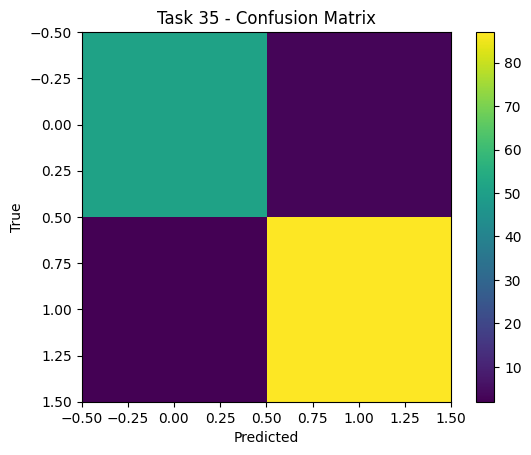

In [42]:



X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
cm = confusion_matrix(y_test, rf.predict(X_test))
print("Task 35 - Confusion matrix:\n", cm)
plt.imshow(cm, interpolation='nearest')
plt.title('Task 35 - Confusion Matrix')
plt.colorbar(); plt.xlabel('Predicted'); plt.ylabel('True'); plt.show()


# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.



In [ ]:
def task_36_stacking_classifier():
    X, y, _ = load_breast_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    estimators = [
        ('dt', DecisionTreeClassifier(max_depth=4, random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, kernel='rbf', random_state=42))),
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', random_state=42)))
    ]
    stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)
    stack.fit(X_train, y_train)
    print("Task 36 - Stacking Accuracy:", accuracy_score(y_test, stack.predict(X_test)))

### Task 37 — RF top-5 most important features







In [ ]:

X, y, data = load_breast_data()
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X, y)
fi = pd.Series(rf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
print("Task 37 - Top 5 features:\n", fi.head(5))

### 38 — Bagging precision, recall, F1









In [49]:
X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42, n_jobs=-1)
bag.fit(X_train, y_train)
preds = bag.predict(X_test)
print("Task 38 - Precision:", precision_score(y_test, preds))
print("Task 38 - Recall:", recall_score(y_test, preds))
print("Task 38 - F1:", f1_score(y_test, preds))

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'


### 39 — Effect of max_depth on RandomForest accuracy




In [47]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

def load_breast_data():
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = data.target
    return X, y, data

X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for d in [None, 3, 5, 10]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    print(f"Task 39 - max_depth={d} -> Accuracy: {accuracy_score(y_test, rf.predict(X_test)):.4f}")

Task 39 - max_depth=None -> Accuracy: 0.9650
Task 39 - max_depth=3 -> Accuracy: 0.9650
Task 39 - max_depth=5 -> Accuracy: 0.9650
Task 39 - max_depth=10 -> Accuracy: 0.9650




### Task 40 — BaggingRegressor with different base estimators (DT, KNN)




In [48]:


def task_41_rf_roc_auc():
    X, y, _ = load_breast_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    probs = rf.predict_proba(X_test)[:, 1]
    print("Task 41 - ROC AUC:", roc_auc_score(y_test, probs))

###  41 — RandomForest ROC-AUC





In [45]:
def task_41_rf_roc_auc():
    X, y, _ = load_breast_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    probs = rf.predict_proba(X_test)[:, 1]
    print("Task 41 - ROC AUC:", roc_auc_score(y_test, probs))

###  42 — Bagging evaluated using cross-validation




In [38]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

def load_breast_data():
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = data.target
    return X, y, data

X, y, _ = load_breast_data()
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42, n_jobs=-1)
scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Task 42 - CV accuracies:", scores)
print("Task 42 - Mean accuracy:", scores.mean())

Task 42 - CV accuracies: [0.89473684 0.93859649 0.99122807 0.96491228 1.        ]
Task 42 - Mean accuracy: 0.9578947368421054


### 43 — RandomForest Precision-Recall curve (plot)




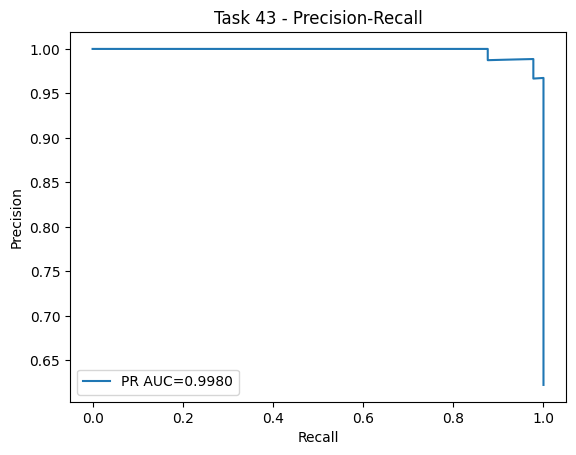

In [37]:
X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, probs)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f'PR AUC={pr_auc:.4f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Task 43 - Precision-Recall'); plt.legend(); plt.show()


###  44 — Stacking with RandomForest + LogisticRegression


X, y, _ = load_breast_data()


In [36]:
X, y, _ = load_breast_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', random_state=42)))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print("Task 44 - Stacking acc:", accuracy_score(y_test, stack.predict(X_test)))

Task 44 - Stacking acc: 0.9790209790209791


#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [34]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=900, n_features=10, noise=12, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for ms in [0.5, 0.7, 1.0]:
    br = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, max_samples=ms, random_state=42, n_jobs=-1)
    br.fit(X_train, y_train)
    print(f"Task 45 - max_samples={ms} -> MSE: {mean_squared_error(y_test, br.predict(X_test)):.4f}")

Task 45 - max_samples=0.5 -> MSE: 9120.2393
Task 45 - max_samples=0.7 -> MSE: 8458.0782
Task 45 - max_samples=1.0 -> MSE: 8503.3293
